In [10]:
## Import Liimg_arrraries
import os
import numpy as np
from osgeo import gdal
from matplotliimg_arr import pyplot as plt

In [3]:
## AVIRIS-NG NEAR PATNA 5m resolution
image_path = r'/home/hewit_leo/Downloads/ang20160224t054832_rfl_v2m3/ang20160224t054832_corr_v2m3_img'

## Outpath and image name 
out_path = r'/home/hewit_leo/Downloads/ang20160224t054832_rfl_v2m3/aviris_5m_image.tif'

In [33]:
## Read and make as array
img = gdal.Open(image_path)
img_arr = img.ReadAsArray()

In [45]:
img_2.RasterXSize, img_2.RasterYSize

(550, 1145)

In [46]:
img_arr_2.shape

(425, 1145, 550)

In [28]:
img.GetGeoTransform()

(494732.788951,
 3.061616997868383e-16,
 5.0,
 2801578.41611,
 5.0,
 -3.061616997868383e-16)

In [9]:
## save this as a tiff
gdal.Warp(out_path, image_path, xRes=5, yRes=5, resampleAlg='nearest', format="GTiff")

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7e40709fe400> >

[]

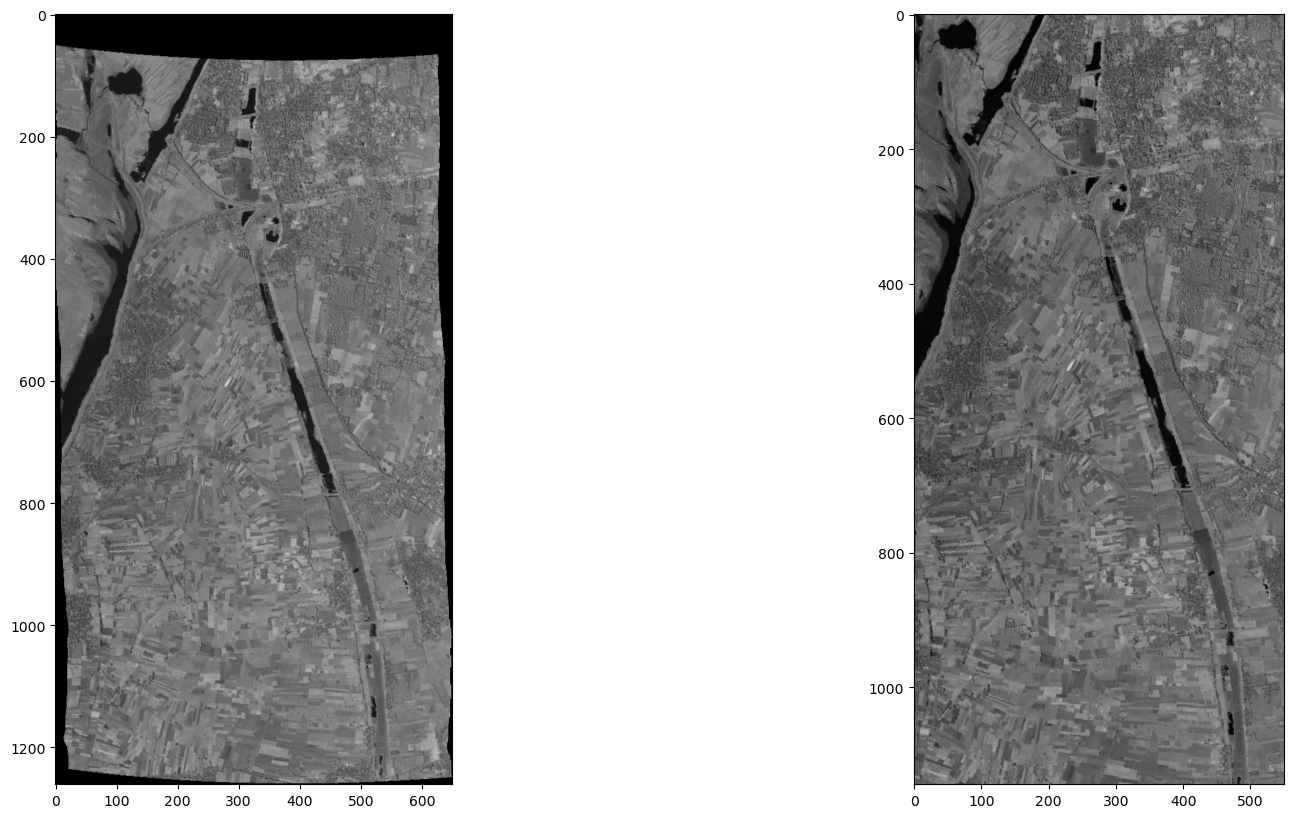

In [41]:
## Visualize img_arroth images (original and saved as tiff)
plt.figure(figsize=(20,10))

## 1
img_arr = np.nan_to_num(img_arr, nan=0.0)
img_arr[img_arr == -9999] = 0
img_arr[img_arr < 0] = 0
img_arr[img_arr > 1] = 0
plt.subplot(1,2,1)
plt.imshow(img_arr[128,:,:], cmap = 'gray')
plt.plot()

img_2 = gdal.Open(out_path)
img_arr_2 = img_2.ReadAsArray()
plt.subplot(1,2,2)
plt.imshow(img_arr_2[128,:,:], cmap='gray')
plt.plot()

In [25]:
img_2.GetGeoTransform()

(494732.788951,
 3.061616997868383e-16,
 5.0,
 2801578.41611,
 5.0,
 -3.061616997868383e-16)

## Using Rasterio

In [38]:
import rasterio
from rasterio.transform import Affine

input_path = image_path 
with rasterio.open(input_path) as src:
    img = src.read()
    profile = src.profile 
    transform = src.transform

img = np.nan_to_num(img, nan=0.0)
img[img == -9999] = 0
img[img < 0] = 0
img[img > 1] = 0
# img = img[:,80:1225, 50:600]

row_start, row_end = 80, 1225
col_start, col_end = 50, 600
img = img[:, row_start:row_end, col_start:col_end]

new_transform = transform * Affine.translation(col_start, row_start)

profile.update({
    "driver": "GTiff",
    "height": img.shape[1],
    "width": img.shape[2],
    "transform": new_transform
})

profile.pop("interleave", None)
profile["interleave"] = "pixel"
profile["driver"] = "GTiff"
output_path = out_path


with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(img)

# Rasterio Resampling

In [40]:
import rasterio
from rasterio.enums import Resampling

upscale_factor = 1/2

with rasterio.open(output_path) as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.nearest
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

In [42]:
dataset.transform

Affine(3.061616997868383e-16, 5.0, 495132.788951,
       5.0, -3.061616997868383e-16, 2801828.41611)